In [1]:
%matplotlib inline
import sys
from os.path import exists

# this is the repository I pulled/downloaded from github: 
CONGA_PATH = '/rd2/user/xiacr/sle/source/conga/'
# confirm that it's the right level directory (since the repo and library have the same name)
assert exists(CONGA_PATH+'/README.md')
sys.path.append(CONGA_PATH)

import scanpy as sc
import conga
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
adata =  sc.read_h5ad('./step3/all_bcell_final.h5ad')
adata

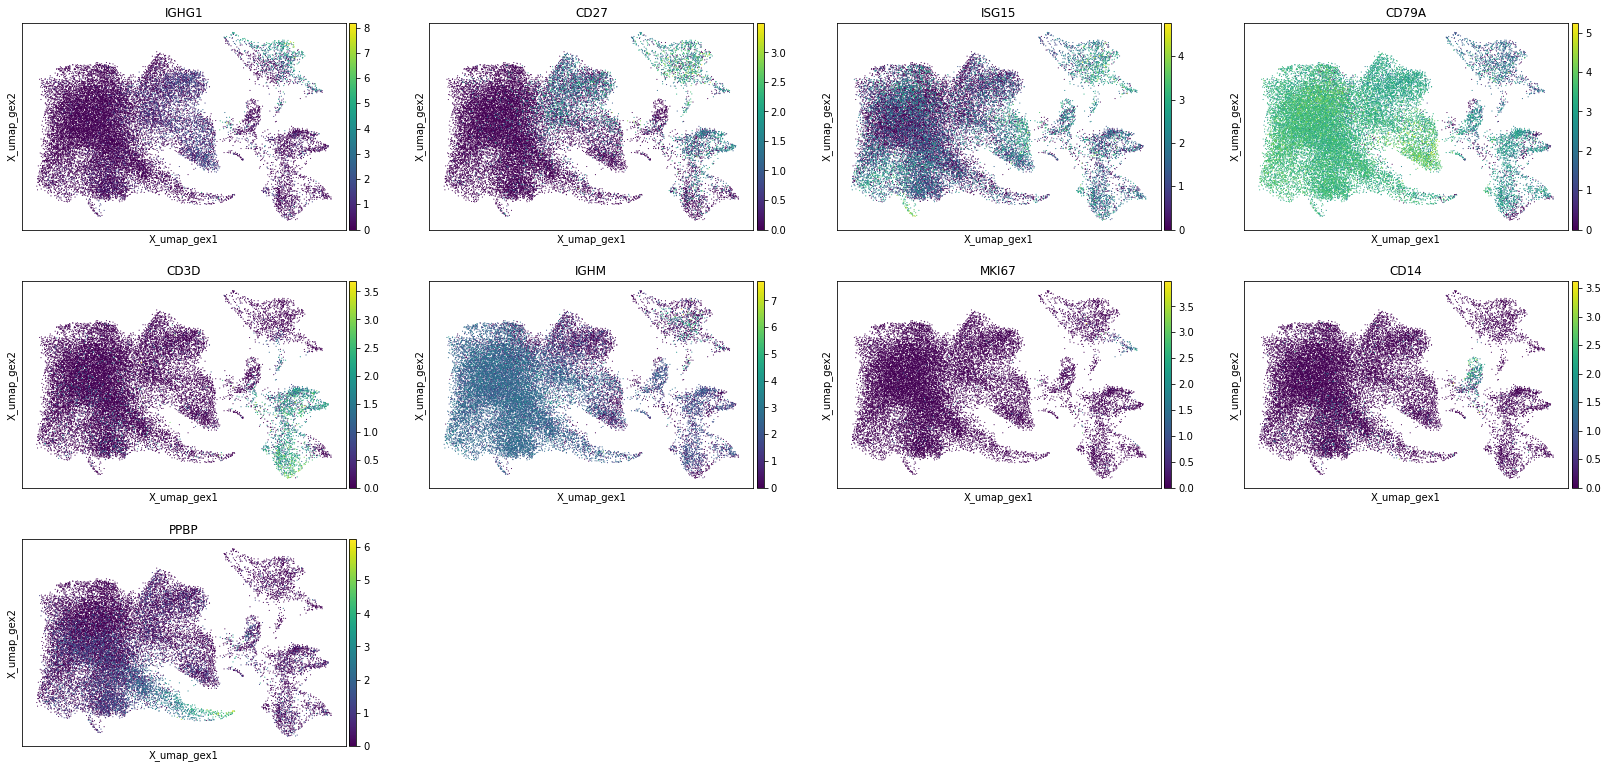

In [13]:
sc.pl.embedding(basis= 'X_umap_gex', adata = adata, color=[ 'IGHG1','CD27', 'ISG15','CD79A','CD3D','IGHM','MKI67','CD14','PPBP'], )

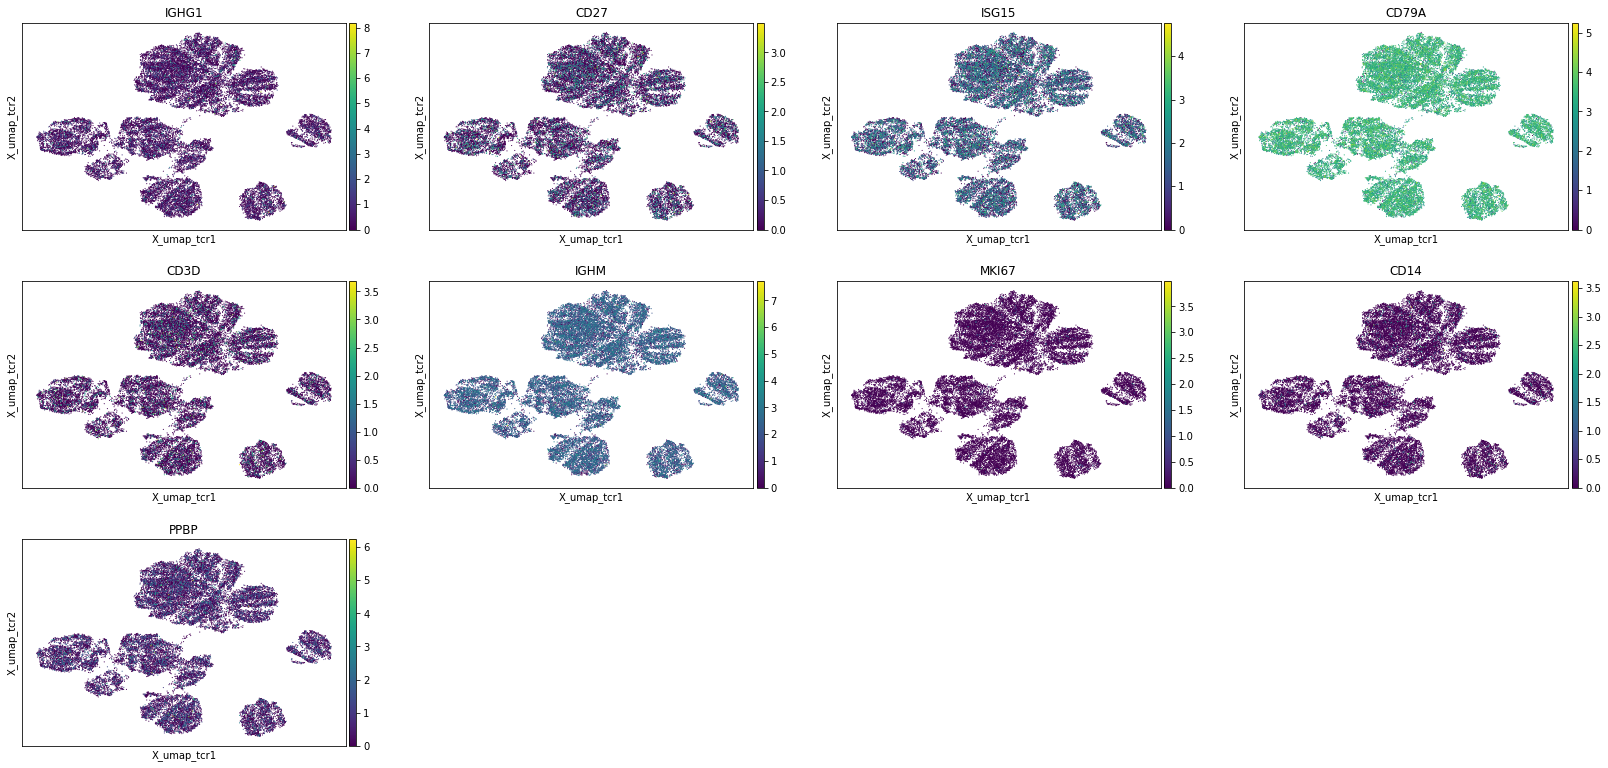

In [126]:
sc.pl.embedding(basis= 'X_umap_tcr', adata = adata, color=[ 'IGHG1','CD27', 'ISG15','CD79A','CD3D','IGHM','MKI67','CD14','PPBP'], )

# prepare seurat meta of B and plasma

In [179]:
# seu_meta.iloc[:,0]
tmp = adata.obs.batch_gex_data.str.split('/',expand=True).iloc[:,7].str.split('_',expand=True).iloc[:,0].reset_index(drop=True) # sample name
adata.obs['seu_barcode'] = 'unknown'
adata.obs['seu_barcode'] = ( tmp + '_' +adata.obs.index.str.split('1-',expand=True,n=1).to_frame().iloc[:,0].reset_index(drop=True)  + '1').to_list()

In [181]:
b_seu_meta = pd.read_csv('./seurat_bcell_filter_meta.csv')
b_seu_meta.iloc[:,0] = b_seu_meta.iloc[:,0].str.replace('_SLE|_HC','',regex=True)
plasma_seu_meta = pd.read_csv('./seurat_plasma_filter_meta.csv')
plasma_seu_meta.iloc[:,0] = plasma_seu_meta.iloc[:,0].str.replace('_SLE|_HC','',regex=True)

In [182]:
plasma_seu_meta.iloc[:,0].isin(adata.obs['seu_barcode']).value_counts()

False    2160
True      994
Name: Unnamed: 0, dtype: int64

In [183]:
seu_meta = pd.concat([b_seu_meta,plasma_seu_meta], join = 'inner')
# seu_meta.shape
seu_meta

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,group,treatment,pair,percent_mito,percent_ribo,S.Score,G2M.Score,Phase,old.ident,RNA_snn_res.0.8,RNA_snn_res.1,seurat_clusters,main_type,PIC,RNA_snn_res.0.6,subtype
0,GW_AAACCTGCACCGCTAG-1,GW,3424,1471,SLE,untreated,unpaired,1.226636,25.087617,0.019518,-0.011282,S,4,6,7,6,Bcell,no,3,B.mem.IGHM+
1,GW_AAACCTGCACTAAGTC-1,GW,3141,1494,SLE,untreated,unpaired,0.891436,22.986310,-0.053059,0.125939,G2M,1,2,3,2,Bcell,no,0,B.transition
2,GW_AAACCTGGTCTCTTAT-1,GW,5943,2090,SLE,untreated,unpaired,1.295642,31.953559,-0.016970,0.008381,G2M,4,6,7,6,Bcell,no,3,B.mem.IGHM+
3,GW_AAACGGGCACAGATTC-1,GW,4084,1440,SLE,untreated,unpaired,1.395690,35.137120,0.022347,-0.032178,S,1,1,3,1,Bcell,no,0,B.naive
4,GW_AAACGGGGTTTGTTTC-1,GW,4269,1767,SLE,untreated,unpaired,1.592879,28.367299,-0.006083,-0.011835,G1,3,8,4,8,Bcell,no,5,B.mem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,ZS_TTATGCTGTGAGGGTT-1,ZS,29293,3398,HC,HC,unpaired,1.310893,16.365685,-0.062429,-0.113241,G1,0,4,5,4,Plasma,no,1,plasma.IgG
3150,ZS_TTATGCTTCTCGTTTA-1,ZS,15768,3556,HC,HC,unpaired,4.217402,22.469559,-0.113205,-0.097412,G1,2,4,5,1,Plasma,no,5,plasma.IgA
3151,ZS_TTCCCAGCATGTTCCC-1,ZS,19518,2423,HC,HC,unpaired,0.840250,7.177990,-0.079657,-0.120601,G1,0,12,12,1,Plasma,no,7,plasma.IgA
3152,ZS_TTTGTCAAGAGCTGGT-1,ZS,15133,2917,HC,HC,unpaired,0.330404,15.211789,-0.099489,-0.101538,G1,2,4,5,1,Plasma,no,7,plasma.IgA


In [184]:
seu_meta.iloc[:,0].isin(adata.obs['seu_barcode']).value_counts()

True     20599
False     5438
Name: Unnamed: 0, dtype: int64

In [185]:
adata.obs['seu_barcode'].isin(seu_meta.iloc[:,0]).value_counts()

True     20599
False     4432
Name: seu_barcode, dtype: int64

In [186]:
tmp = adata.obs.merge(right= seu_meta, left_on='seu_barcode',right_on='Unnamed: 0',how  = 'left')
tmp.index =  tmp['seu_barcode']
adata.obs  =tmp

/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Unnamed: 0' as categorical
/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/xiacr/miniconda3/envs/conga/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed

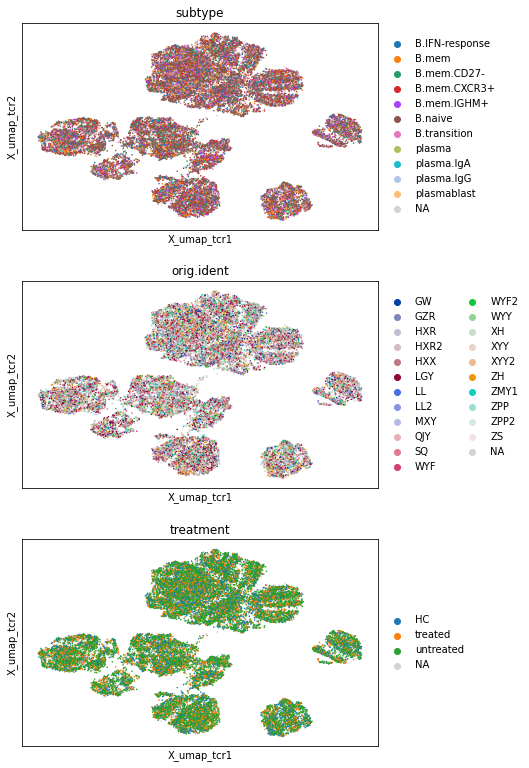

In [187]:
sc.pl.embedding(basis= 'X_umap_tcr', adata = adata, color=[ 'subtype','orig.ident', 'treatment'],ncols=1,size=10 )

In [188]:
adata.obs.treatment.isna().value_counts()

False    20599
True      4432
Name: treatment, dtype: int64

# subset the adata object

In [189]:
adata_sub = adata_subset = adata[~adata.obs.treatment.isna()]

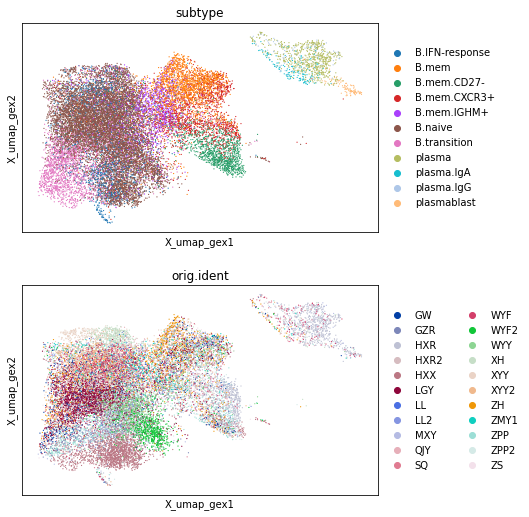

In [192]:
sc.pl.embedding(basis= 'X_umap_gex', adata = adata_sub, color=[ 'subtype','orig.ident'], ncols=1)

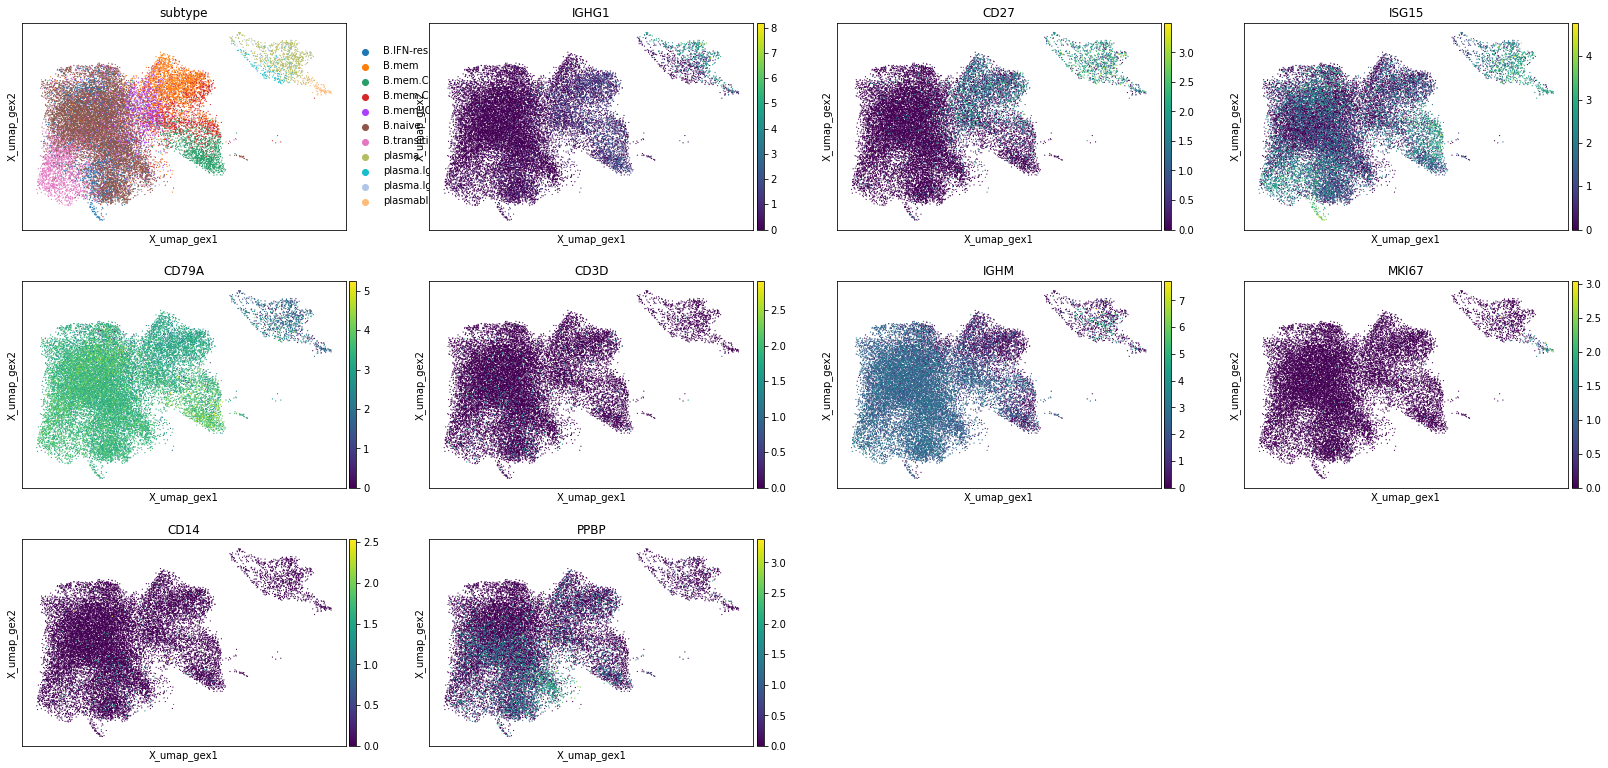

In [190]:
# sc.pl.embedding(basis= 'X_umap_tcr', adata = adata_sub, color=[ 'subtype','orig.ident', 'treatment'],ncols=1,size=10 )
sc.pl.embedding(basis= 'X_umap_gex', adata = adata_sub, color=[ 'subtype','IGHG1','CD27', 'ISG15','CD79A','IGHM','MKI67','PPBP'], )

#  CONGA analysis again
we find that conga shell use some filter parameters which are not reasonable(such as filter the cell with more than 2000 genes), so we decide run conga in jupter step by step and use the out come from merge
please see the notebook **'reanalysis_from_step2.ipynb'**